# Deepa_Ghag Neolen_IPL 2020 Player Performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
train_data = pd.read_csv("Training.csv")

In [3]:
train_data

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,11415_RA Jadeja,9,1,0,0,0,0,10,0,0,0,0,0,10
15912,11415_Harbhajan Singh,0,0,0,0,0,0,0,0,0,0,0,0,0
15913,11415_RG Sharma,15,2,1,0,0,0,19,0,0,0,0,0,19
15914,11415_SN Thakur,2,0,0,0,0,0,2,2,0,0,0,50,52


In [4]:
train_data['batting_points'] = train_data['Runs'] + train_data['Boundaries'] + 2 * train_data['Six'] + 8 * train_data['Fifty'] + 16 * train_data['Hundred'] - 2 * train_data['Duck']
train_data['bowling_points'] = 25 * train_data['Wickets'] + 8 * train_data['4W_Haul'] + 16 * train_data['5W_Haul'] + 8 * train_data['Maidens']
train_data['total'] = train_data['batting_points'] + train_data['bowling_points']
train_data

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points,batting_points,bowling_points,total
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44,19,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38,38,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29,29,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86,86,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,11415_RA Jadeja,9,1,0,0,0,0,10,0,0,0,0,0,10,10,0,10
15912,11415_Harbhajan Singh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15913,11415_RG Sharma,15,2,1,0,0,0,19,0,0,0,0,0,19,19,0,19
15914,11415_SN Thakur,2,0,0,0,0,0,2,2,0,0,0,50,52,2,50,52


In [5]:
train_data.shape

(15916, 17)

In [6]:
train_data['player_name'] = train_data['Id']
train_data['match_number'] =  train_data['Id']
for p in range(0, len( train_data)):
    train_data['player_name'][p] =  train_data['Id'][p].split("_")[-1]
    train_data['match_number'][p] = int( train_data['Id'][p].split('_')[:1][0])

<ipython-input-6-31faafa1568c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['player_name'][p] =  train_data['Id'][p].split("_")[-1]
<ipython-input-6-31faafa1568c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['match_number'][p] = int( train_data['Id'][p].split('_')[:1][0])


In [7]:
train_data.head()

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points,batting_points,bowling_points,total,player_name,match_number
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25,0,25,25,Bipul Sharma,1
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44,19,25,44,DJ Hooda,1
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38,38,0,38,KM Jadhav,1
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29,29,0,29,Mandeep Singh,1
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86,86,0,86,Yuvraj Singh,1


In [8]:
train_data.isnull().sum()

Id                0
Runs              0
Boundaries        0
Six               0
Fifty             0
Hundred           0
Duck              0
Batting_Points    0
Wickets           0
4W_Haul           0
5W_Haul           0
Maidens           0
Bowling_Points    0
Total Points      0
batting_points    0
bowling_points    0
total             0
player_name       0
match_number      0
dtype: int64

<AxesSubplot:>

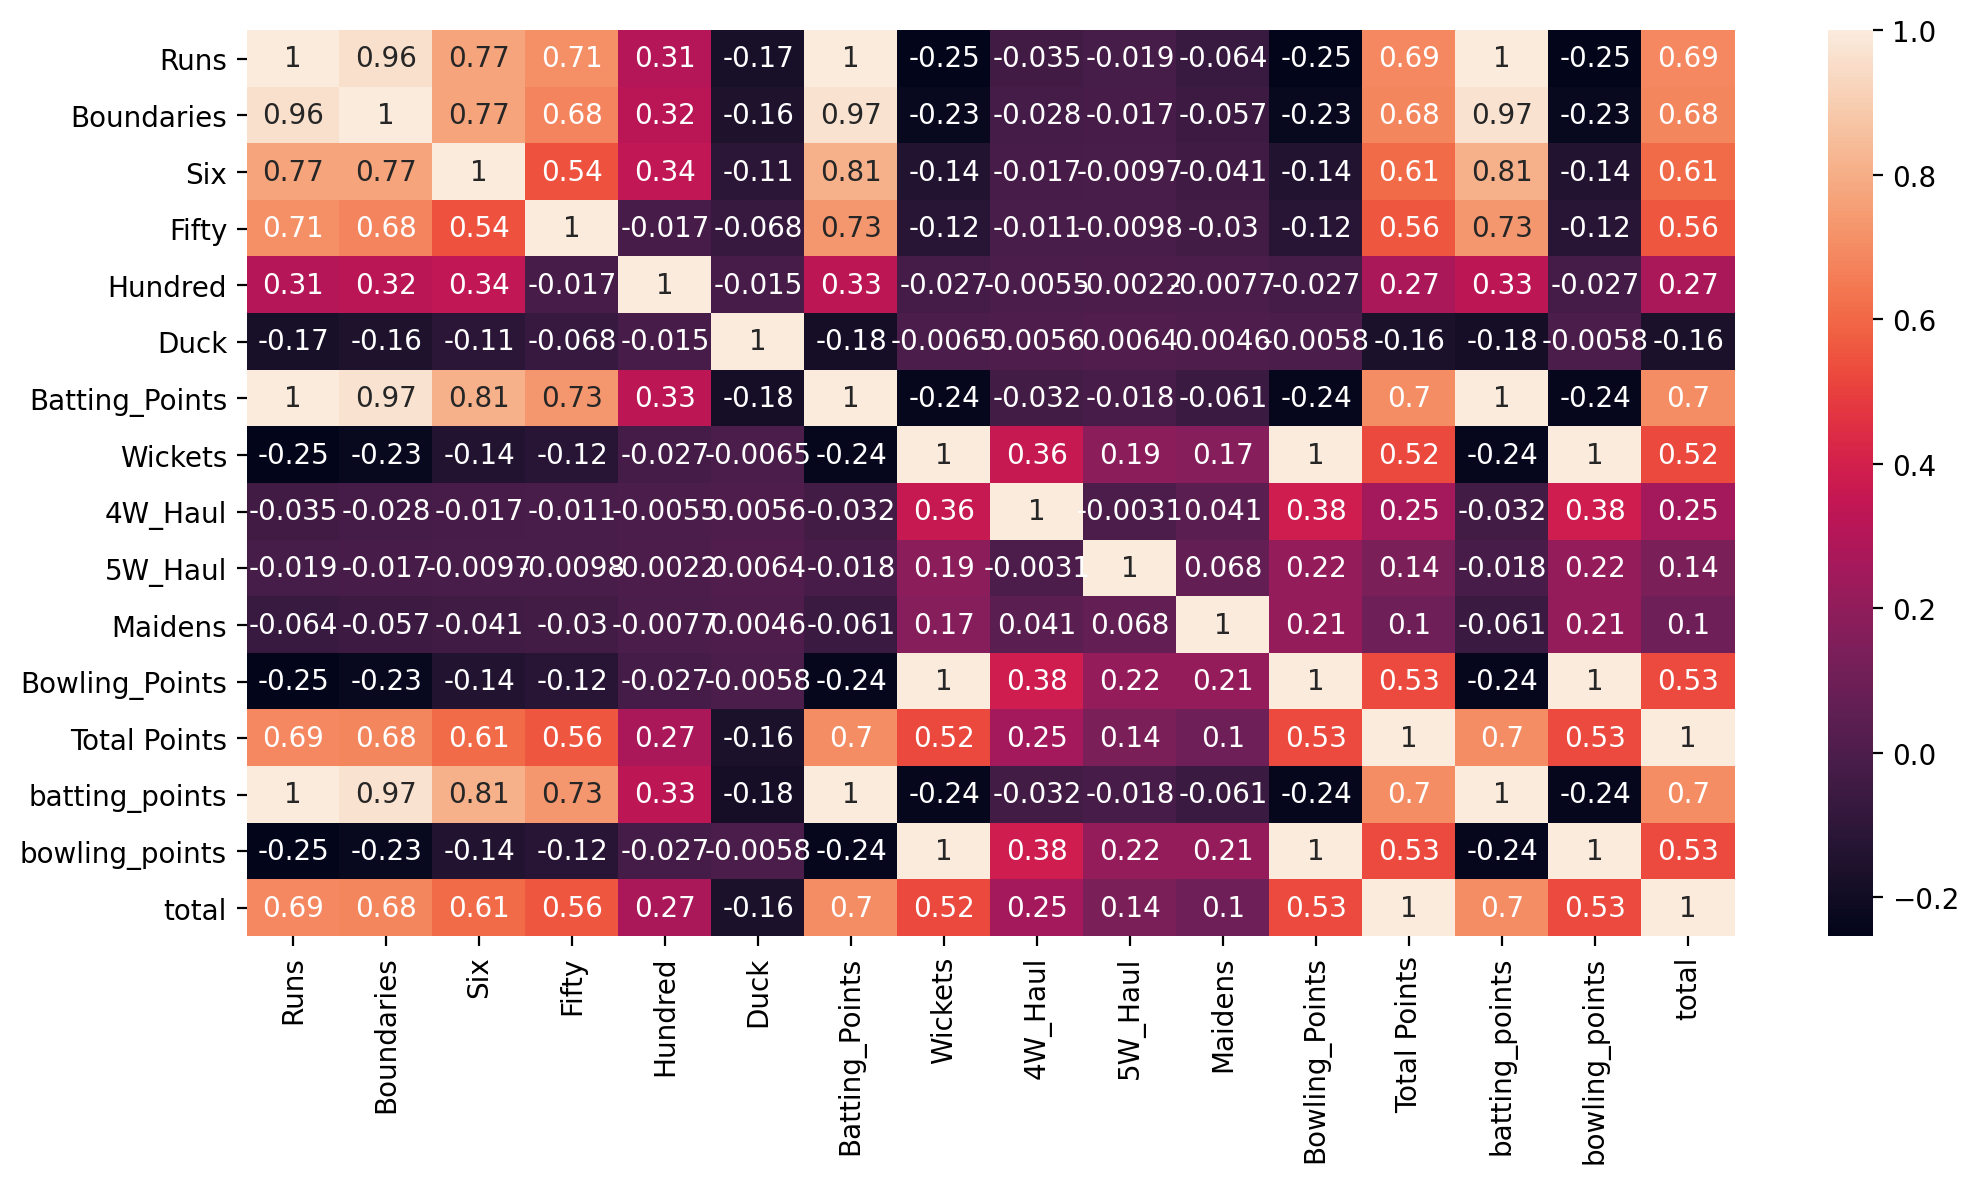

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(train_data.corr(),annot =True)

<AxesSubplot:xlabel='Batting_Points', ylabel='Bowling_Points'>

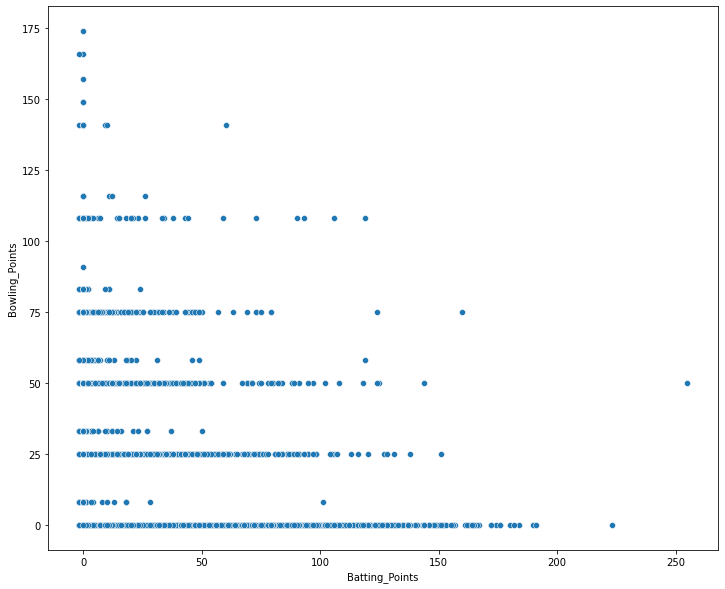

In [10]:
plt.figure(figsize = (12,10))
sns.scatterplot(x ='Batting_Points', y = 'Bowling_Points', data=train_data)

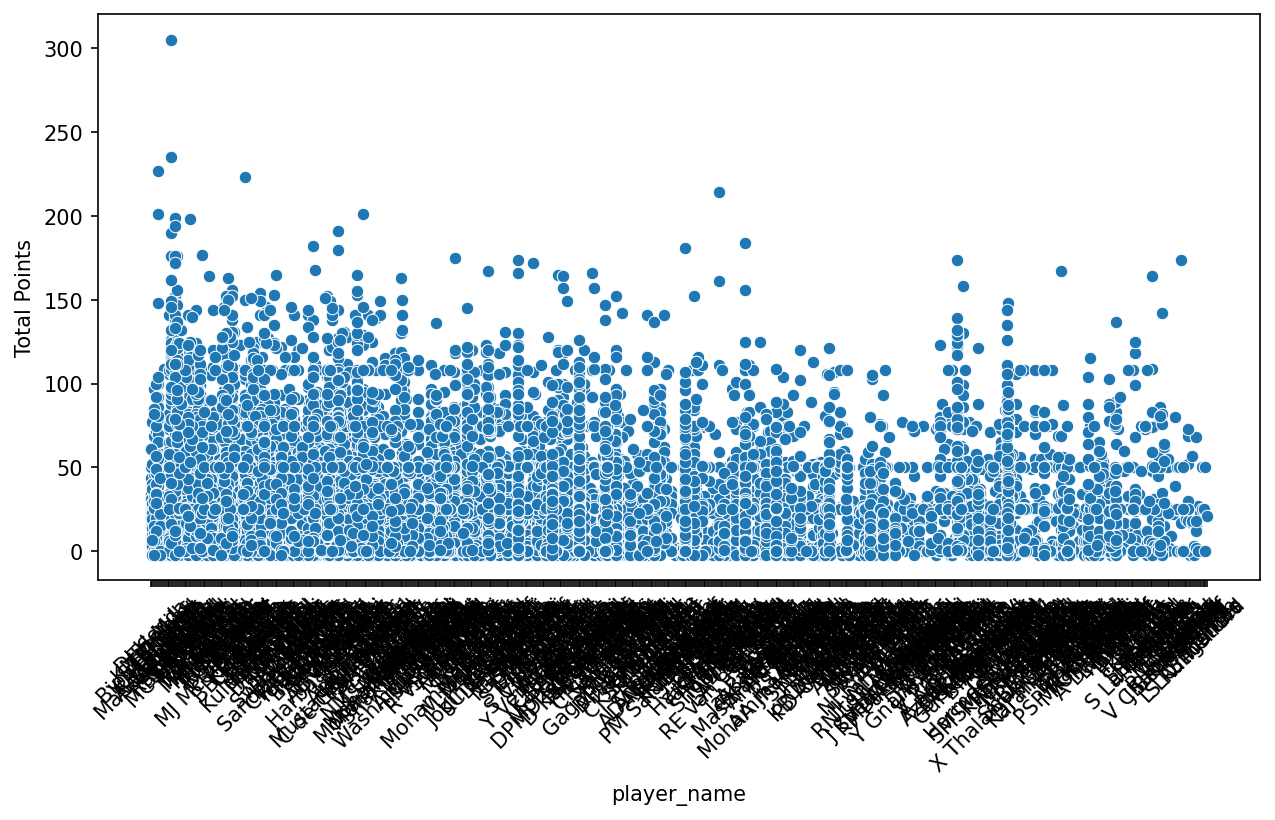

In [11]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=train_data,y='Total Points',x='player_name')
plt.xticks(rotation=45);

In [12]:
data = pd.DataFrame()
data['total_score'] = train_data['Total Points']
data['match_number']    = train_data['match_number']
data['player_name']= train_data['player_name']

In [13]:
data

,total_score,match_number,player_name
0,25,1,Bipul Sharma
1,44,1,DJ Hooda
2,38,1,KM Jadhav
3,29,1,Mandeep Singh
4,86,1,Yuvraj Singh
...,...,...,...
15911,10,11415,RA Jadeja
15912,0,11415,Harbhajan Singh
15913,19,11415,RG Sharma
15914,52,11415,SN Thakur


# 2020 matches

In [14]:
IPL_2020 =pd.read_csv('Matches IPL 2020.csv')

In [15]:
IPL_2020.head()

,match_id,city,date,team1,team2,venue,umpire1,umpire2,umpire3
0,1216492,Abu Dhabi,9/19/2020,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,Dubai (DSC),9/20/2020,DC,KXIP,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,Dubai (DSC),9/21/2020,SRH,RCB,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,Sharjah,9/22/2020,RR,CSK,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,Abu Dhabi,9/23/2020,KKR,MI,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma


In [16]:
IPL_2020.isnull().sum()

match_id    0
city        0
date        0
team1       0
team2       0
venue       0
umpire1     0
umpire2     0
umpire3     0
dtype: int64

In [19]:
IPL_2020.columns

Index(['match_id', 'city', 'date', 'team1', 'team2', 'venue', 'umpire1',
       'umpire2', 'umpire3'],
      dtype='object')

<AxesSubplot:xlabel='city', ylabel='count'>

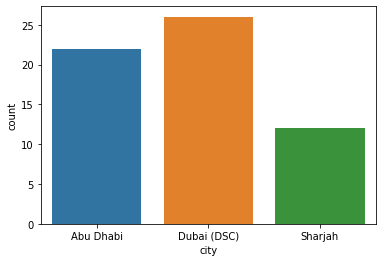

In [20]:
sns.countplot(x='city',data =IPL_2020)

In [21]:
IPL_2008_2019 = pd.read_csv('Matches IPL 2008-2019.csv')
IPL_2008_2019

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [22]:
IPL_2008_2019.isnull().sum()

match_id             0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [23]:
IPL_2008_2019["city"].fillna("0", inplace = True) 


In [24]:
IPL_2008_2019["city"]

0          Bangalore
1         Chandigarh
2              Delhi
3             Mumbai
4            Kolkata
           ...      
751           Mumbai
752          Chennai
753    Visakhapatnam
754    Visakhapatnam
755        Hyderabad
Name: city, Length: 756, dtype: object

In [25]:
IPL_2008_2019['umpire3'].fillna('0',inplace=True)
IPL_2008_2019['umpire3']

0                            0
1                            0
2                            0
3                            0
4                            0
                ...           
751                     S Ravi
752                  Ian Gould
753                          0
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, Length: 756, dtype: object

In [26]:
IPL_2008_2019.isnull().sum()

match_id           0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
umpire3            0
dtype: int64

In [27]:
IPL_2008_2019['umpire1'].fillna('0',inplace=True)
IPL_2008_2019['umpire2'].fillna('0',inplace=True)
IPL_2008_2019['winner'].fillna('0',inplace=True)
IPL_2008_2019['player_of_match'].fillna('0',inplace=True)
IPL_2008_2019

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,0
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,0
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,0
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,0
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,0,0,0
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [28]:
IPL_2008_2019.isnull().sum()

match_id           0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

C:\Users\anike\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner', ylabel='count'>

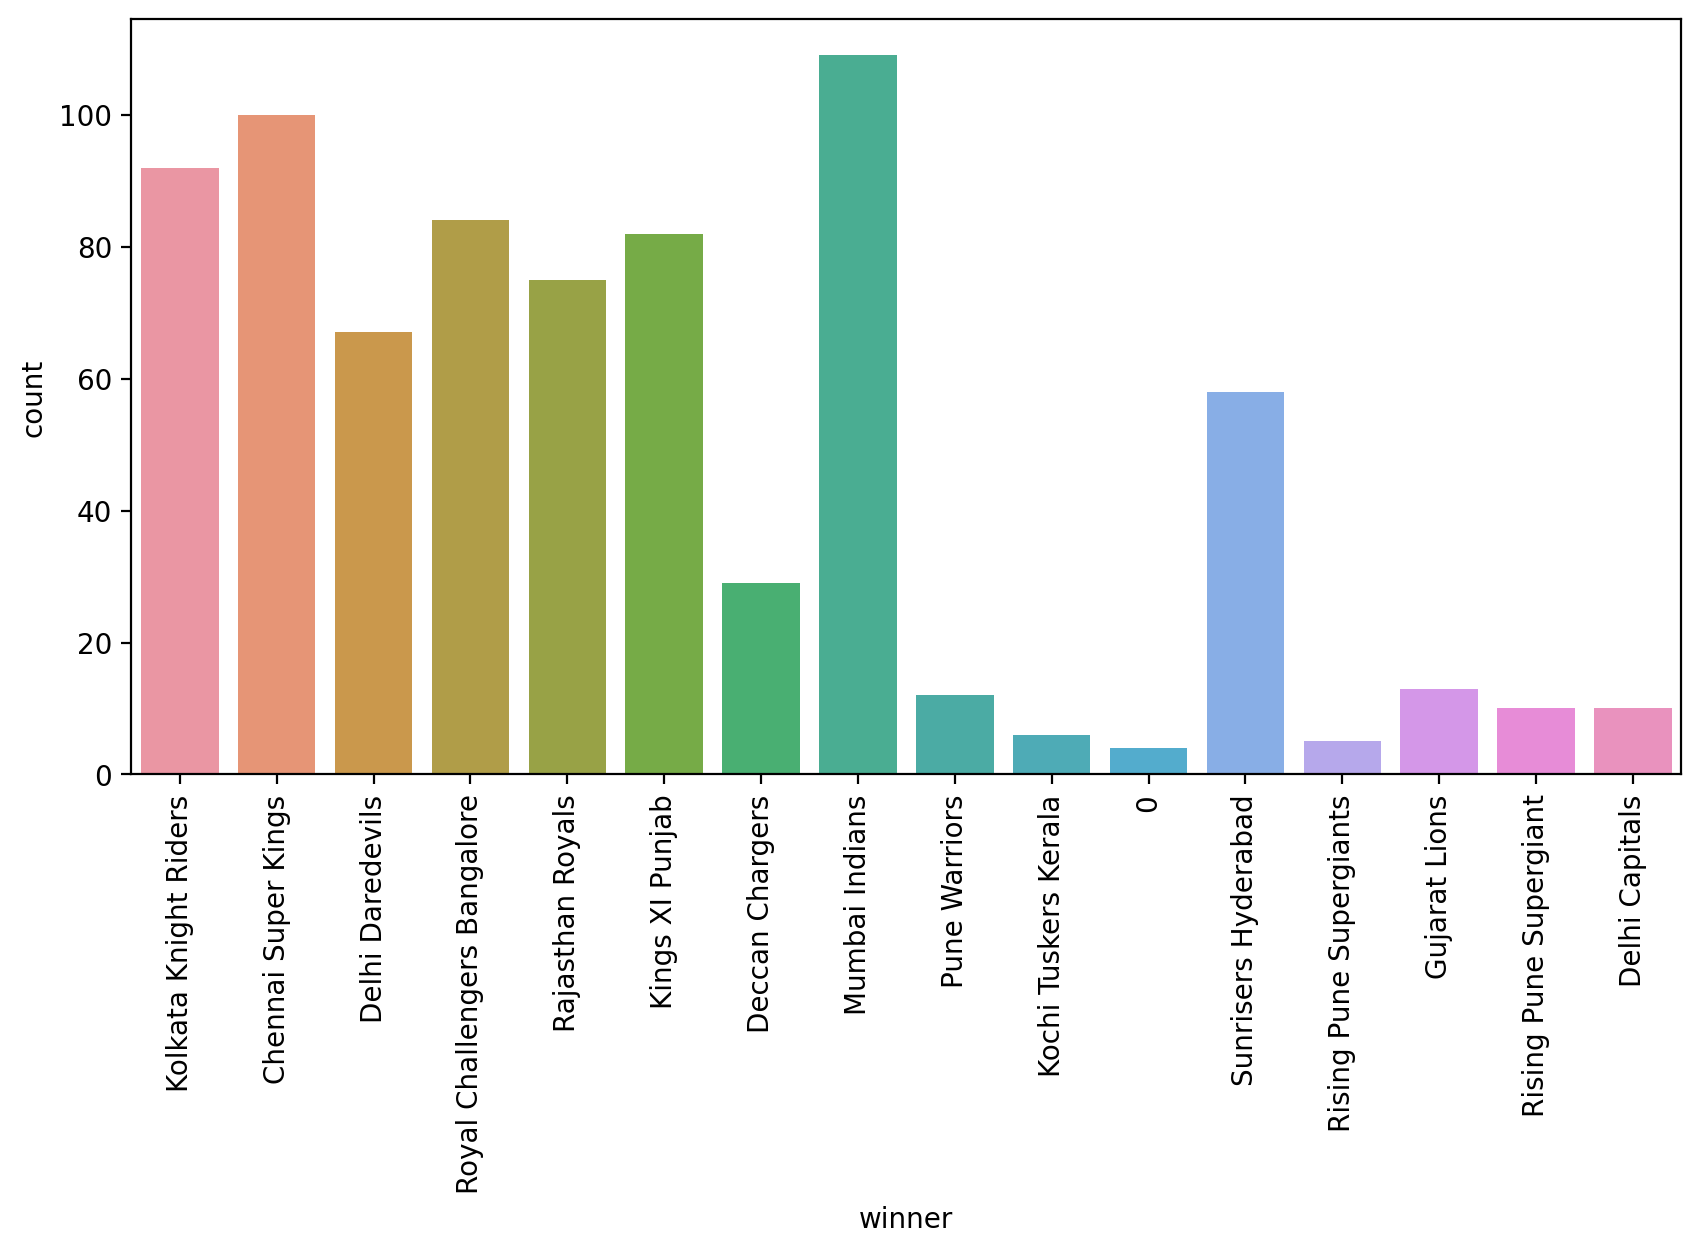

In [29]:
plt.figure(figsize=(10,5),dpi = 200)
plt.xticks(rotation=90)
sns.countplot(IPL_2008_2019['winner'])

C:\Users\anike\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_winner', ylabel='count'>

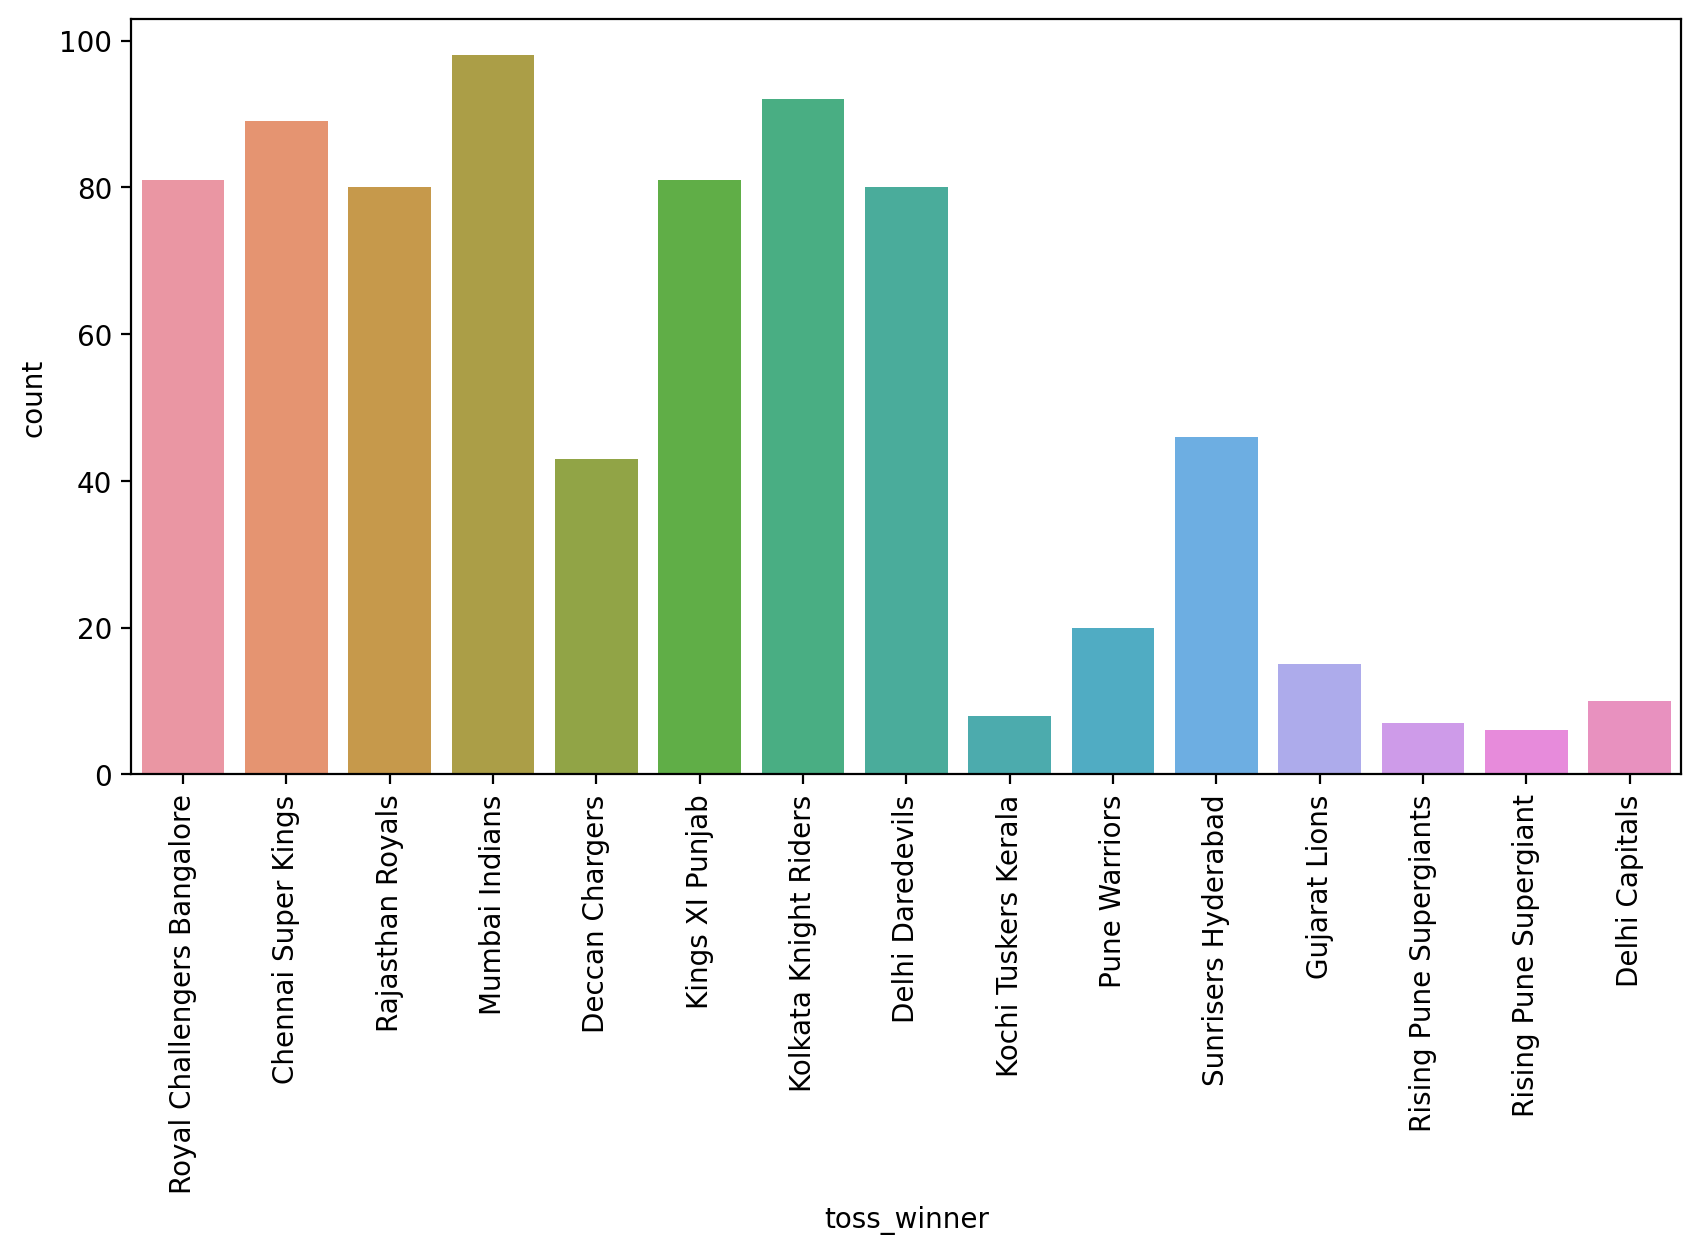

In [30]:
plt.figure(figsize=(10,5),dpi = 200)
plt.xticks(rotation=90)
sns.countplot(IPL_2008_2019['toss_winner'])

In [31]:
IPL_2008_2019 = IPL_2008_2019[['match_id','city','date','winner']]
IPL_2008_2019.head()

,match_id,city,date,winner
0,60,Bangalore,18-04-2008,Kolkata Knight Riders
1,61,Chandigarh,19-04-2008,Chennai Super Kings
2,62,Delhi,19-04-2008,Delhi Daredevils
3,63,Mumbai,20-04-2008,Royal Challengers Bangalore
4,64,Kolkata,20-04-2008,Kolkata Knight Riders


 ## 2020 ipl squads

In [32]:
IPL_squad20 = pd.read_csv('IPL 2020 Squads.csv',encoding= 'unicode_escape')

In [33]:
IPL_squad20

,player_ipl_id,Player_name,Player_country,Player_ipl_team
0,CSK1,MS Dhoni (C),India,CSK
1,CSK2,Suresh Raina,India,CSK
2,CSK3,Kedar Jadhav,India,CSK
3,CSK4,Ravindra Jadeja,India,CSK
4,CSK5,Dwayne Bravo,West Indies,CSK
...,...,...,...,...
122,SRH13,Shreevats Goswami,India,SRH
123,SRH14,Basil Thampi,India,SRH
124,SRH15,Abhishek Sharma,India,SRH
125,SRH16,Billy Stanlake,Australia,SRH


In [34]:
IPL_squad20['Player_name'].value_counts()

Mayank Markande     2
Sanju Samson        1
Khaleel Ahmed       1
Shreyas Iyer        1
Faf du Plessis      1
                   ..
Kuldeep Yadav       1
Nicholas Pooran     1
Shubman Gill        1
Avesh Khan          1
Darshan Nalkande    1
Name: Player_name, Length: 126, dtype: int64

# sample_submission data

In [35]:
sub_data=pd.read_csv('sample_submission.csv')
sub_data

,Id,Total Points
0,1216492_AS Yadav,0
1,1216492_AT Rayudu,0
2,1216492_DL Chahar,0
3,1216492_F du Plessis,0
4,1216492_HH Pandya,0
...,...,...
1278,1237181_S Hetmyer,0
1279,1237181_SA Yadav,0
1280,1237181_SS Iyer,0
1281,1237181_SS Tiwary,0


# WE are getting 1283 rows  2 columns

# PREPROCESS DATA

In [45]:
data.head()

,total_score,match_number,player_name
0,25,1,Bipul Sharma
1,44,1,DJ Hooda
2,38,1,KM Jadhav
3,29,1,Mandeep Singh
4,86,1,Yuvraj Singh


In [46]:
data.player_name.value_counts()

SK Raina       189
RG Sharma      183
V Kohli        170
RV Uthappa     170
MS Dhoni       170
              ... 
M Wood           1
GR Napier        1
S Singh          1
A Dananjaya      1
A Nel            1
Name: player_name, Length: 559, dtype: int64

In [47]:
data.shape

(15916, 3)

In [48]:
data1 = data.drop(['player_name'],axis=1)

In [49]:
data1

,total_score,match_number
0,25,1
1,44,1
2,38,1
3,29,1
4,86,1
...,...,...
15911,10,11415
15912,0,11415
15913,19,11415
15914,52,11415


# PREDICTION 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [42]:
Pred_ = train_data.groupby(['Id','player_name'])['total'].sum().reset_index()
Pred_ =Pred_.sort_values(by = 'total',ascending = False)
Pred_['Id'] = Pred_['Id'].astype('str')
Pred_["Id"] = Pred_['Id'] +'_'+ Pred_['player_name']
Pred_

,Id,player_name,total
8500,411_CH Gayle_CH Gayle,CH Gayle,305
5447,280_CH Gayle_CH Gayle,CH Gayle,235
10402,492_Yuvraj Singh_Yuvraj Singh,Yuvraj Singh,227
13148,60_BB McCullum_BB McCullum,BB McCullum,223
4716,249_PC Valthaty_PC Valthaty,PC Valthaty,214
...,...,...,...
10929,515_AP Tare_AP Tare,AP Tare,-2
2474,152_NV Ojha_NV Ojha,NV Ojha,-2
5502,282_Y Nagar_Y Nagar,Y Nagar,-2
10875,512_KM Jadhav_KM Jadhav,KM Jadhav,-2


In [43]:
pred_l = train_data[['Id','player_name','Total Points']]
pred_l

,Id,player_name,Total Points
0,1_Bipul Sharma,Bipul Sharma,25
1,1_DJ Hooda,DJ Hooda,44
2,1_KM Jadhav,KM Jadhav,38
3,1_Mandeep Singh,Mandeep Singh,29
4,1_Yuvraj Singh,Yuvraj Singh,86
...,...,...,...
15911,11415_RA Jadeja,RA Jadeja,10
15912,11415_Harbhajan Singh,Harbhajan Singh,0
15913,11415_RG Sharma,RG Sharma,19
15914,11415_SN Thakur,SN Thakur,52


In [44]:
from math import sqrt
from sklearn.metrics import mean_squared_error

#calculate RMSE
rmse = sqrt(mean_squared_error(pred_l['Total Points'], Pred_['total'] )) 
rmse

42.67794820667273